In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
print("imported")

imported






## Evaluation in Regression Model.

**Evaluation of regression model can be done in 3 ways**

1. R^2 (Pronounced as R-squared or co-efficient of determination)
2. Mean Absolute Error (MAE).
3. Mean Squared Error (MSE).

In [2]:
file = pd.read_csv("../datasets/transformed_cars.csv")
file.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
dtype: int64

In [3]:
from sklearn.ensemble import RandomForestRegressor

# Creating the Random seed.
np.random.seed(42)

x = file.drop("38",axis = 1)
y = file["38"]

# horizontal
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

# importing the model to fit the score
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor()

In [4]:
model.score(x_test,y_test)

0.9746145838083284

## R^2 Evaluation technique

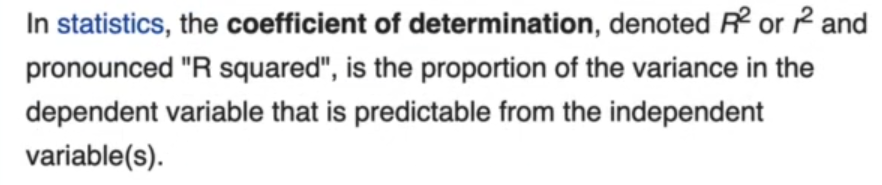

## What does R^2 do?
* compares your model's predication to the mean of the targets. values can range from -♾️ to 1. if the model predicts the mean of the targets then the value is 0. else if the model predticts the range of the numbers then it's R^2 value is 1. 

In [5]:
model.score(x_test,y_test)

0.9746145838083284

In [8]:
# now create a array filled with mean values of y_test, to compare it with r^2

y_test_mean = np.full(len(y_test),y_test.mean())


In [9]:
y_test_mean

array([70.95443931, 70.95443931, 70.95443931, 70.95443931, 70.95443931,
       70.95443931, 70.95443931, 70.95443931, 70.95443931, 70.95443931,
       70.95443931, 70.95443931, 70.95443931, 70.95443931, 70.95443931,
       70.95443931, 70.95443931, 70.95443931])

In [10]:
from sklearn.metrics import r2_score

r2_score(y_test,y_test_mean)

0.0

A zero score means that the model has predicted the mean of the targets correctly.

In [11]:
# what is perfect score
r2_score(y_test,y_test)

1.0

perfect prediction

0.0 score meand that the model has a decent prediction or the percentage (here 97.... ) is more than the mean of the y_test (i.e 70.95...) so the value is one, if the value is less than the mean of y_test then the r^2 value can go negative too...

but still, we cannot predict if correct then how much correct prediction and if wrong then how much wrong prediction.

# Mean Absolute Error

#### what does mean absolut error or MAE does?

* Mean absolute error -  breakdown take the MEAN and then its ABSOLUTE OR POSITIVE value(MOD |-2| = 2 ), then what we get is the deviation of each value form actual value, and its mean value.


In [16]:
from sklearn.metrics import mean_absolute_error

# we need y_preds to compare the error 
y_preds = model.predict(x_test)

In [17]:
y_preds

array([ 58.69726324,  69.50544426,  51.37805006,  77.34222507,
        58.78532515,  70.77241586,  43.86175299,  70.59566017,
       119.49194606,  81.54552641,  46.24230005,  53.66997784,
        61.86525553,  94.22365936,  69.63912125, 130.52444281,
        53.07628566,  80.95185038])

In [18]:
y_test

40     54.590045
22     67.876108
55     51.113474
70     76.096570
0      58.280150
26     70.078322
39     36.672284
65     71.171664
10    113.765874
44     76.584440
81     49.865774
35     54.269548
56     62.239967
86    102.528984
12     67.314462
4     134.656858
18     53.566200
28     76.509185
Name: 38, dtype: float64

In [21]:
y_preds.mean()

71.78713900837779

In [22]:
MAE = mean_absolute_error(y_test,y_preds)

In [23]:
MAE

2.8439678750888913

What do this value tell us?

This tells us on average how far every prediction is away from the actual value.

here now we have, the array filled with prediction values made on `x_test` and we also have `y_test` so the | `y_pred` - `y_test` | is the positive value of deviation, but if you take the mean value of the values and then present it with one value, that is the actual MAE.

In [27]:
# getting the MAE back 

df = pd.DataFrame(data={"Actual Values": y_test, "Predicated Values": y_preds}) # data is a keyword.

df

,Actual Values,Predicated Values
40,54.590045,58.697263
22,67.876108,69.505444
55,51.113474,51.378050
70,76.096570,77.342225
0,58.280150,58.785325
26,70.078322,70.772416
39,36.672284,43.861753
65,71.171664,70.595660
10,113.765874,119.491946
44,76.584440,81.545526


In [38]:
# adding a column of difference
df["Difference"] = df["Actual Values"]-df["Predicated Values"]


df

,Actual Values,Predicated Values,Difference,Absolute_difference
40,54.590045,58.697263,-4.107218,4.107218
22,67.876108,69.505444,-1.629336,1.629336
55,51.113474,51.378050,-0.264576,0.264576
70,76.096570,77.342225,-1.245655,1.245655
0,58.280150,58.785325,-0.505176,0.505176
26,70.078322,70.772416,-0.694094,0.694094
39,36.672284,43.861753,-7.189469,7.189469
65,71.171664,70.595660,0.576004,0.576004
10,113.765874,119.491946,-5.726072,5.726072
44,76.584440,81.545526,-4.961087,4.961087


In [37]:
# taking the mod of each value
import math
df["Absolute_difference"]= abs(df["Actual Values"]-df["Predicated Values"])
df

,Actual Values,Predicated Values,Difference,Absolute_difference
40,54.590045,58.697263,-4.107218,4.107218
22,67.876108,69.505444,-1.629336,1.629336
55,51.113474,51.378050,-0.264576,0.264576
70,76.096570,77.342225,-1.245655,1.245655
0,58.280150,58.785325,-0.505176,0.505176
26,70.078322,70.772416,-0.694094,0.694094
39,36.672284,43.861753,-7.189469,7.189469
65,71.171664,70.595660,0.576004,0.576004
10,113.765874,119.491946,-5.726072,5.726072
44,76.584440,81.545526,-4.961087,4.961087


In [40]:
# now take the mean of all the values of the column "Absolute mean"

abs_mean = df["Absolute_difference"].mean()


In [41]:
abs_mean

2.8439678750888913

In [42]:
# checking if MAE and abs_mean are same or not

abs_mean ==  MAE

True

## Mean Squared Error

As the name suggests the MSE takes square of the error(difference).

In [45]:
from sklearn.metrics import mean_squared_error

# we again need predicted values
y_preds = model.predict(x_test)

MSE = mean_squared_error(y_test,y_preds)


In [46]:
MSE

14.242733643013906

In [47]:
# gettig the MSE 
df = pd.DataFrame(data={"Actual Value":y_test,"Predicated Values":y_preds})
df

,Actual Value,Predicated Values
40,54.590045,58.697263
22,67.876108,69.505444
55,51.113474,51.378050
70,76.096570,77.342225
0,58.280150,58.785325
26,70.078322,70.772416
39,36.672284,43.861753
65,71.171664,70.595660
10,113.765874,119.491946
44,76.584440,81.545526


In [48]:
# adding the difference columns
df["difference"]=df["Actual Value"]-df["Predicated Values"]
df

,Actual Value,Predicated Values,difference
40,54.590045,58.697263,-4.107218
22,67.876108,69.505444,-1.629336
55,51.113474,51.378050,-0.264576
70,76.096570,77.342225,-1.245655
0,58.280150,58.785325,-0.505176
26,70.078322,70.772416,-0.694094
39,36.672284,43.861753,-7.189469
65,71.171664,70.595660,0.576004
10,113.765874,119.491946,-5.726072
44,76.584440,81.545526,-4.961087


In [49]:
# squaring the difference

df["squared_diff"]=df["difference"]*df["difference"]
df

,Actual Value,Predicated Values,difference,squared_diff
40,54.590045,58.697263,-4.107218,16.869240
22,67.876108,69.505444,-1.629336,2.654737
55,51.113474,51.378050,-0.264576,0.070000
70,76.096570,77.342225,-1.245655,1.551655
0,58.280150,58.785325,-0.505176,0.255202
26,70.078322,70.772416,-0.694094,0.481767
39,36.672284,43.861753,-7.189469,51.688470
65,71.171664,70.595660,0.576004,0.331781
10,113.765874,119.491946,-5.726072,32.787902
44,76.584440,81.545526,-4.961087,24.612382


In [50]:
sq_mean = df["squared_diff"].mean()

In [51]:
sq_mean

14.242733643013906

In [52]:
# checking if the sq_mean and MSE column is same or not
sq_mean == MSE

True

### What is the difference between MAE and MSE?

*In MAE we Take the Absolute value(MODULUS==| |) of the difference between Actual value and predicted value(Error), but in MSE we take the Square of the difference between Actual value and Predicted value(error).

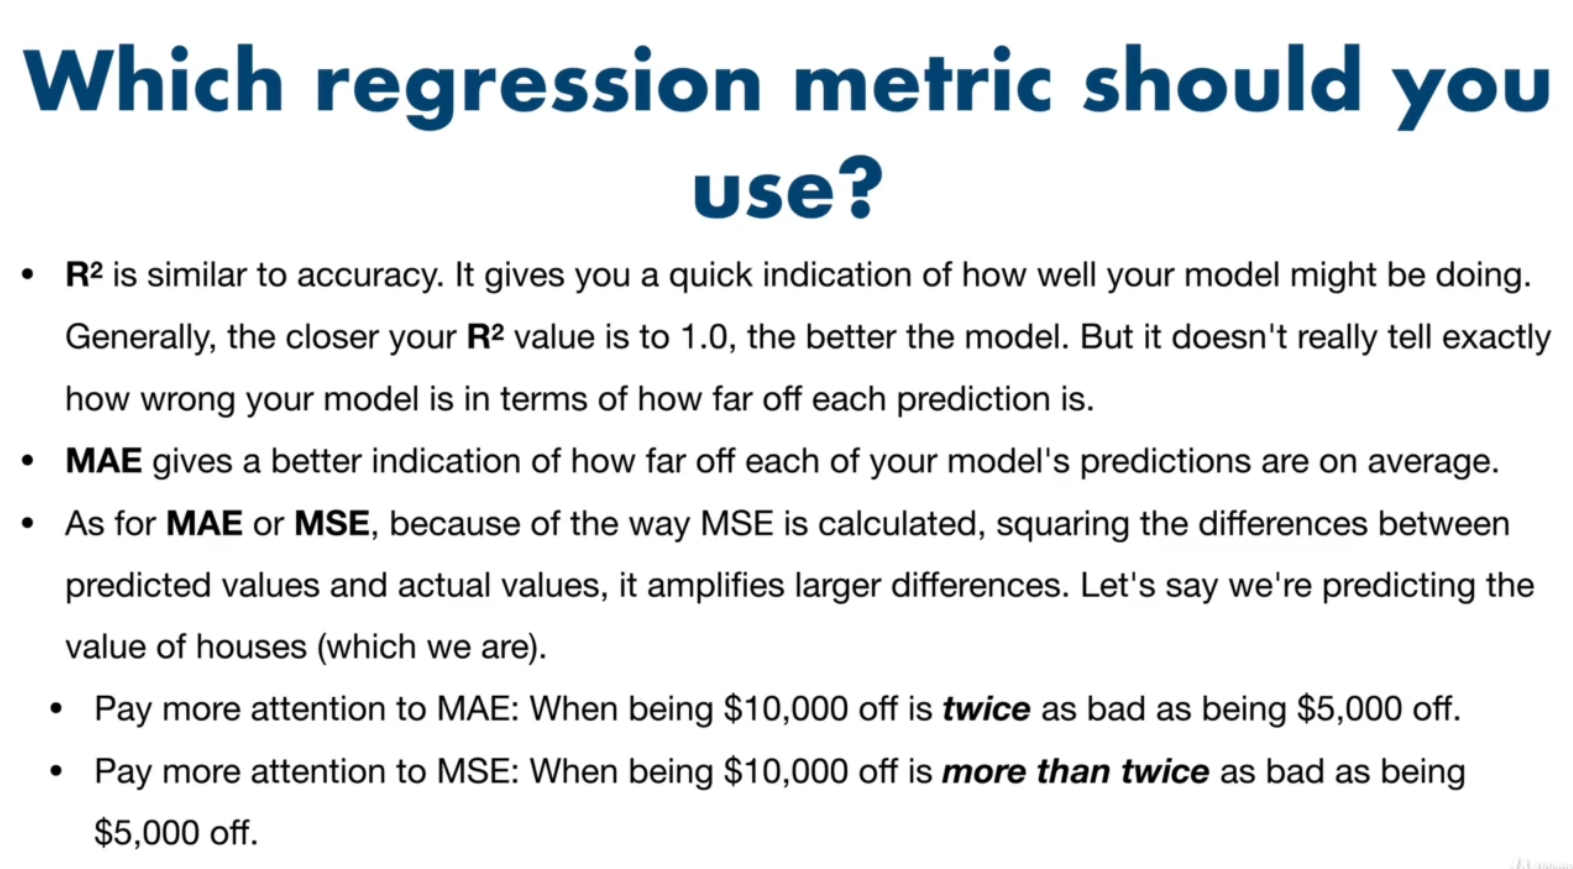

--------------------------------------------------------------------------------------------------------------------------

## Scoring Parameter for Regression

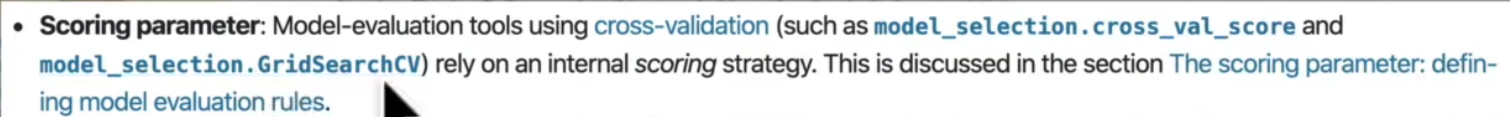

------------------------------------------------------------------------------------------------------

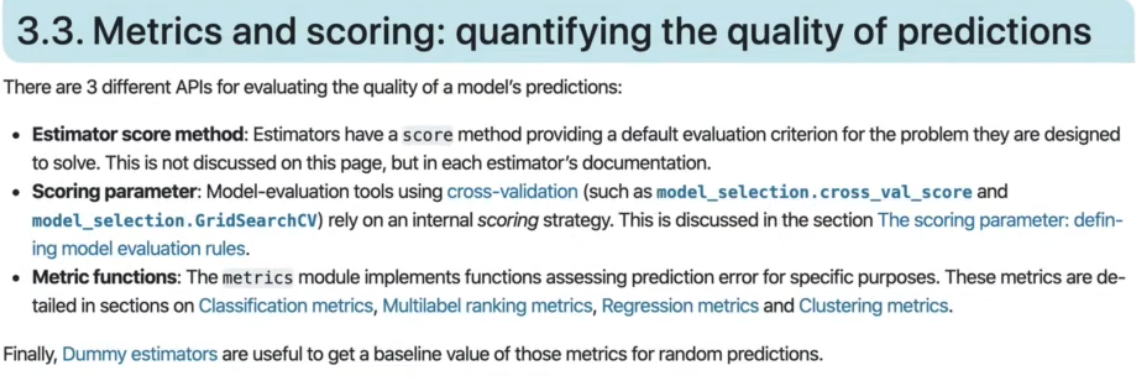

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)

model.fit(x_train,y_train)

RandomForestRegressor()

**Scoring parameters for regression**

1. r2
2. MAE
3. MSE

In [75]:
cv=cross_val_score(model,x,y,cv=5)

In [77]:
cv.mean()

0.9455519591414057

In [69]:
# printing the score using `model.score()` and using cross validation

print(f"The model accuracy with model.score() is: {model.score(x_test,y_test)*100}%")

The model accuracy with model.score() is: 98.14156792494138%


In [70]:
# printing the score using cross validation 

print(f"The model score using cross validation is: {cv_acc.mean()*100}%")

The model score using cross validation is: 94.55695114337894%


In [71]:
cv_recall = cross_val_score(model,x,y,cv=5,scoring = "r2")
cv_recall.mean()

0.9431201013175563

In [72]:
cv_ng_mean_absolute_error = cross_val_score(model,x,y,cv=5,scoring = "neg_mean_absolute_error")
cv_ng_mean_absolute_error.mean() # why neg coz ---> smaller the value smaller the model accuracy

# or -> 

-3.175703921685563

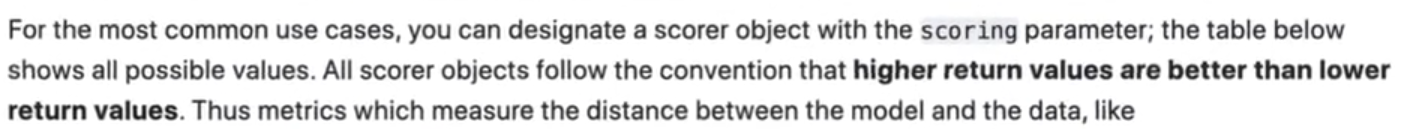

In [74]:
cv_ng_mean_squared_error = cross_val_score(model,x,y,cv=5,scoring = "neg_mean_squared_error")
cv_ng_mean_squared_error.mean() # why neg coz ---> smaller the value smaller the model accuracy

-48.22988671823208

### Scoring parameters for classification

**scoring parameters are**:

1. Accuracy
2. precision
3. recall
4. f1


In [80]:
file = pd.read_csv("../datasets/heart.csv")
file

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [81]:
file.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

In [82]:
# splitting the data

# vertical
x = file.drop("target",axis = 1)
y = file["target"]

# horizonatal
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# creating the seed

np.random.seed(42)

# creating a model
model = RandomForestClassifier()

# training 
model.fit(x_train,y_train)

RandomForestClassifier()

In [83]:
model.score(x_test,y_test)

0.819672131147541

In [85]:
# normal cross_val_score
cv = cross_val_score(model,x,y,cv=5,scoring=None)
cv.mean()

0.8281420765027322

In [86]:
# accuracy -> how much correct predictions made
cv_acc = cross_val_score(model,x,y,cv=5,scoring="accuracy")
cv_acc.mean()

0.8249180327868852

In [87]:
#  Precision -> 
cv_pre = cross_val_score(model,x,y,cv=5,scoring="precision")
cv_pre.mean()

0.8287348909787239

In [88]:
#  recall
cv_rec = cross_val_score(model,x,y,cv=5,scoring="recall")
cv_rec.mean()

0.8545454545454545

In [89]:
# f1 
cv_f1 = cross_val_score(model,x,y,cv=5,scoring="f1")
cv_f1.mean()

0.8298702211240485

-------------------------------------------------------------------------------------------------

## Metric Functions

Different metrics functions using sklearn for Classification:

`from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score`

1. `accuracy_score(y_test,y_preds)`
2. `recall_score(y_test,y_preds)`
3. `precision_score(y_test,y_preds)`
4. `f1_score(y_test,y_preds)`

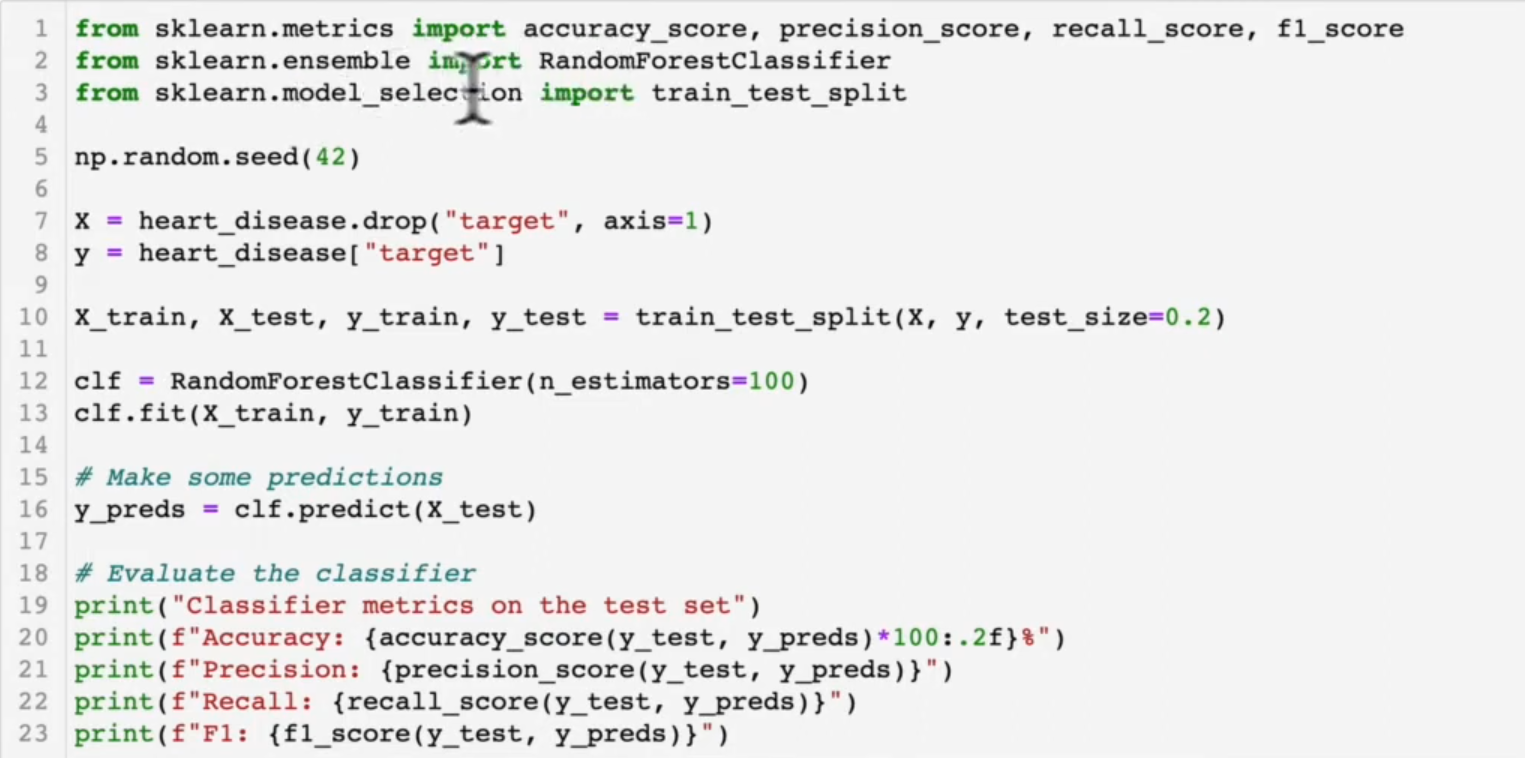 


## Metric Functions for Regression

Metric functions for regression include:

`from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error`

1. `r2_score(y_test,y_preds)`
2. `mean_absolute_error(y_test,y_preds)`
3. `mean_squared_error(y_test,y_preds)`


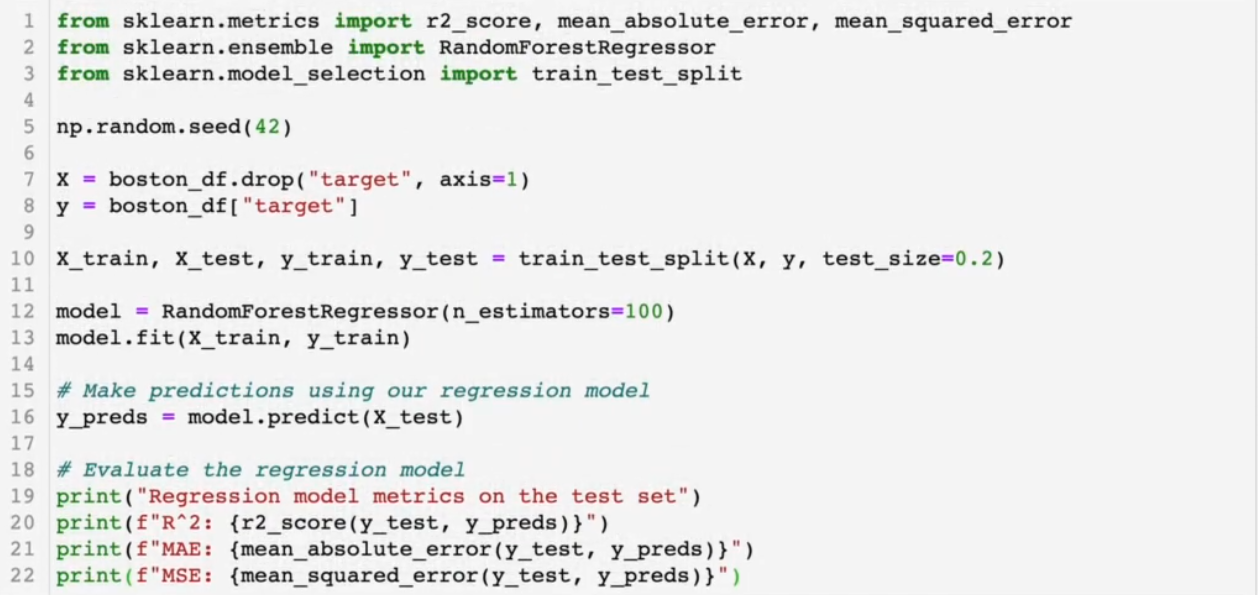